In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 10000
data_df = pd.read_csv('HW1.csv')
data = np.array(data_df)
data_x_train = data[0:N, 1:]
data_t_train = data[0:N, 0]
data_x_test = data[N:, 1:]
data_t_test = data[N:, 0]



mean = np.mean(data_x_train, axis =0)
std = np.std(data_x_train, axis = 0 , ddof = 1)

data_x_train = (data_x_train - mean) / std
data_x_test = (data_x_test - mean) / std

Regression

In [7]:
class Regression :
    def __init__ (self, data_x_train, data_t_train):
        self.data_x_train = data_x_train
        self.data_t_train = data_t_train
    def basis(self, x , j , M):
        u = 3*(-M + 1 + 2*(j-1)*(M-1)/(M-2))/M
        a = (x - u) /0.1
        #print(a)
        return 1/(1 + np.exp(-a))
    def phi_vec(self, x , M):
        phi = np.ones( M * 11)
        for k in range(11):
            for j in range(1,M):
                phi[j+k*M]= self.basis(x[k] , j , M)
        return phi
    def generate_design_matrix(self,N,M):
        phi = np.zeros((N,M*11))
        for i in range(N):
            phi[i] = self.phi_vec(self.data_x_train[i], M)
        return phi
    def getw(self,N,M,lamba = 0.0):
        phi = self.generate_design_matrix(N,M)
        w = np.dot(np.dot(np.linalg.pinv(lamba * np.eye(11*M) + np.dot((np.transpose(phi)),phi)),np.transpose(phi)),self.data_t_train)
        #w = np.linalg.pinv(phi.T @ phi) @ phi.T @ self.data_t_train
        return w
    def get_testing(self,x,w,N,M):
        y = np.zeros(N)
        for i in range(N):
           phi = self.phi_vec(x[i] , M)
           y[i] = np.dot(w , phi)
        return y
    def MSE(self,x,t,w,M):
        n = np.size(x,0)
        sum = 0
        for i in range(n):
            sum+=(np.abs(np.dot(w,self.phi_vec(x[i],M))-t[i]))**2
        return sum/n
    def ACC(self,x,t,w,M):
        n = np.size(x,0)
        sum = 0
        for i in range(n):
            sum+=(np.abs(np.dot(w,self.phi_vec(x[i],M))-t[i])/(t[i] if t[i]!=0 else 1))
        return 1-sum/n



Drawing Picture

In [13]:
def draw(x,y,title,xlabel,ylabel,plot_label):
    plt.figure(1)
    plt.title(title)
    plt.xlabel(xlabel, rotation=0)
    plt.ylabel(ylabel, rotation=0)
    plt.plot(x, y, marker='o', label=plot_label)
    plt.legend()
    plt.show()

Q1 And Q2

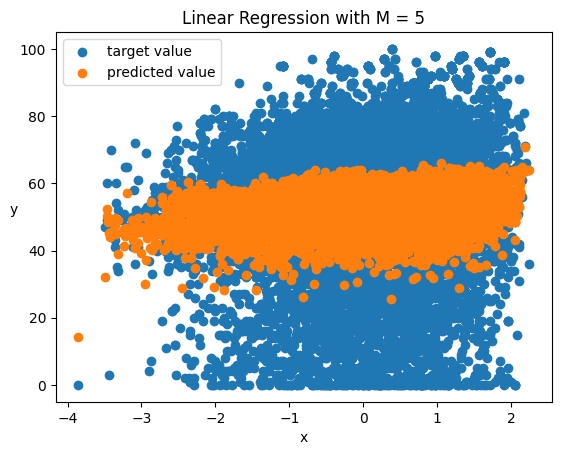

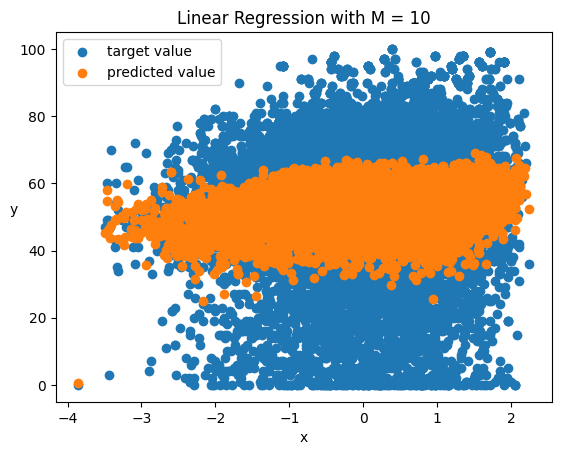

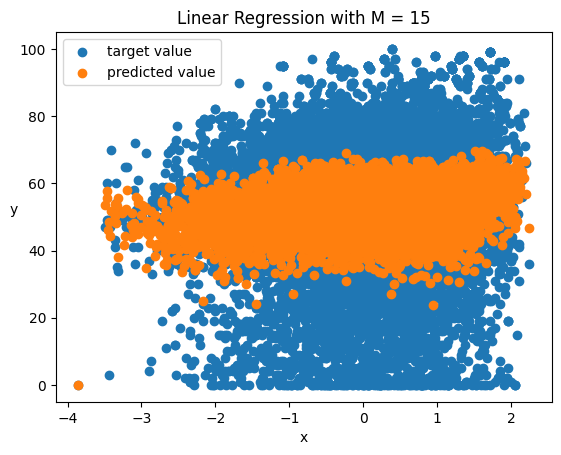

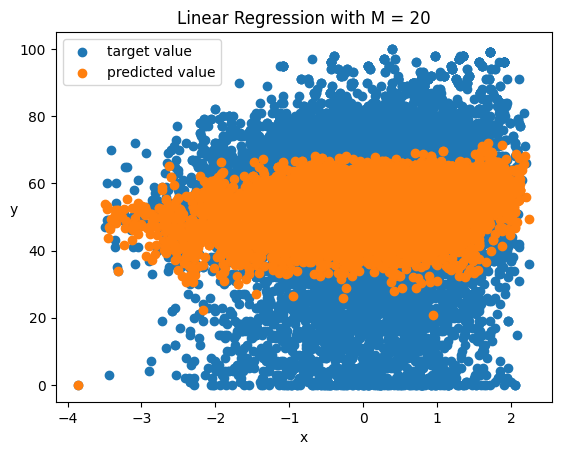

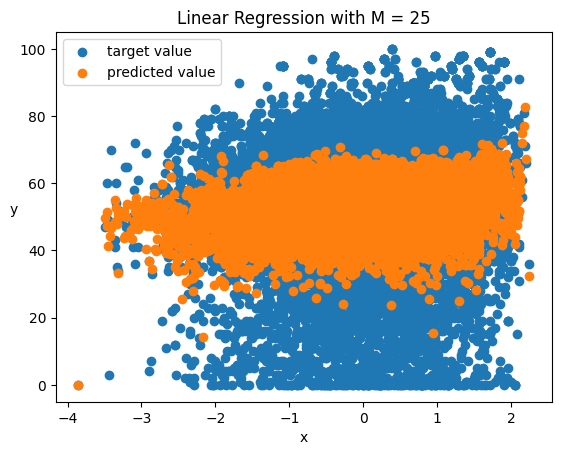

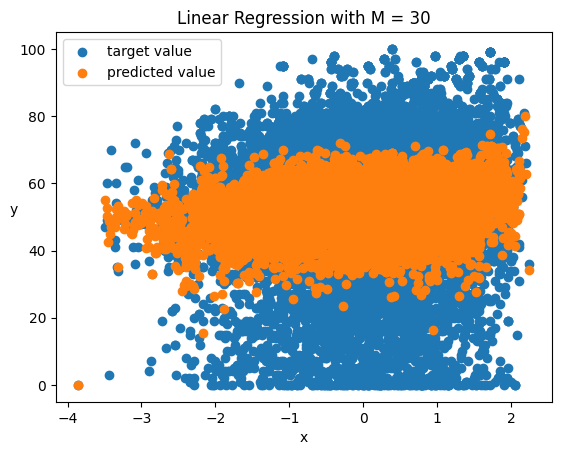

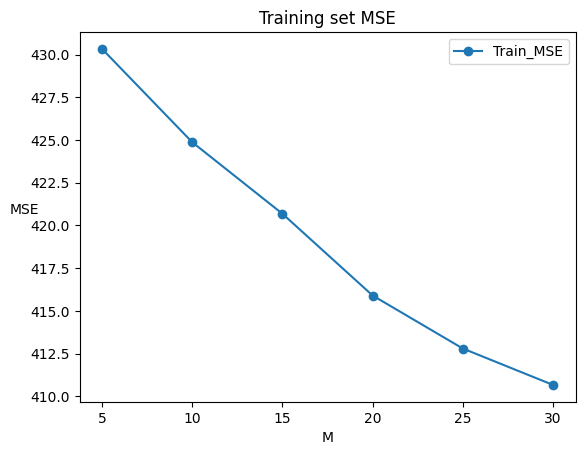

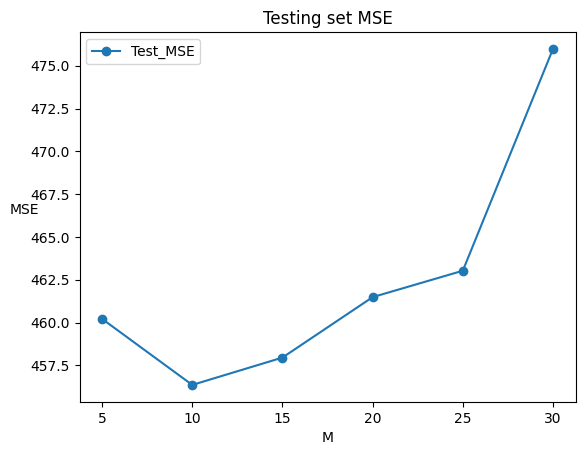

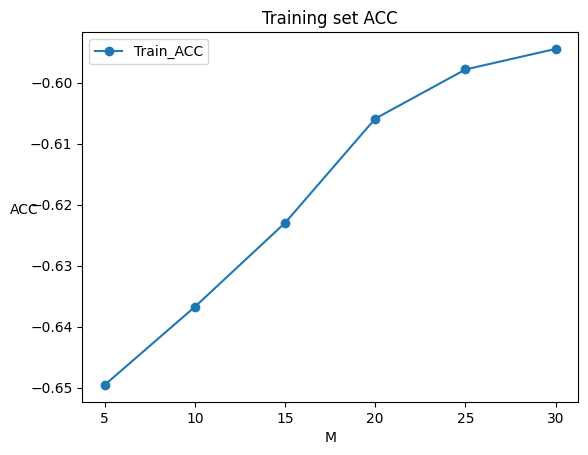

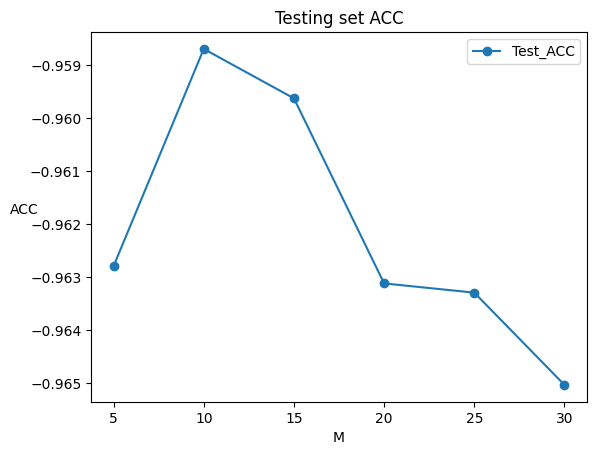

Training set MSE : [430.33004342 424.87001569 420.68442552 415.90081726 412.7990344
 410.66856043]
Testing set MSE : [460.21411224 456.35641908 457.95274264 461.48461188 463.02574536
 475.98213515]
Training set ACC : [-0.64957324 -0.63677074 -0.6230059  -0.6059148  -0.59785109 -0.59448211]
Testing set ACC : [-0.96279141 -0.95868674 -0.95962105 -0.96311842 -0.96329275 -0.96503663]


In [14]:
M = [5, 10, 15, 20, 25, 30]
linear = Regression (data_x_train ,data_t_train)
train_MSE = np.array([])
test_MSE = np.array([])
train_ACC = np.array([])
test_ACC = np.array([])

for m in M:
    w = linear.getw(N,m)
    train_MSE = np.append(train_MSE,linear.MSE(data_x_train,data_t_train,w,m))
    test_MSE = np.append(test_MSE,linear.MSE(data_x_test,data_t_test,w,m))
    train_ACC = np.append(train_ACC,linear.ACC(data_x_train,data_t_train,w,m))
    test_ACC = np.append(test_ACC,linear.ACC(data_x_test,data_t_test,w,m))
    #print(f'Training data MSE for M = {m} : ', linear.MSE(data_x_train,data_t_train,w,m))
    #print(f'Testing data MSE for M = {m} : ', linear.MSE(data_x_test,data_t_test,w,m))
    #print(f'Training data ACC for M = {m} : ', linear.ACC(data_x_train,data_t_train,w,m))
    #print(f'Testing data ACC for M = {m} : ', linear.ACC(data_x_test,data_t_test,w,m))
    #x = np.linspace(-4, 2, 600)
    y = linear.get_testing(data_x_train ,w , N, m)
    plt.figure(1)
    plt.title(f"Linear Regression with M = {m}")
    plt.xlabel("x", rotation=0)
    plt.ylabel("y", rotation=0)
    plt.scatter(data_x_train[:,2], data_t_train, label="target value")
    plt.scatter(data_x_train[:,2], y, label="predicted value")
    plt.legend()
    plt.show()


draw(M,train_MSE,"Training set MSE","M","MSE","Train_MSE")
draw(M,test_MSE,"Testing set MSE","M","MSE","Test_MSE")
draw(M,train_ACC,"Training set ACC","M","ACC","Train_ACC")
draw(M,test_ACC,"Testing set ACC","M","ACC","Test_ACC")
print("Training set MSE :",train_MSE)
print("Testing set MSE :",test_MSE)
print("Training set ACC :",train_ACC)
print("Testing set ACC :",test_ACC)




Q3 ( find M for minimum MSE )


In [15]:
#k = np.array(range(3,25))
mean_arr = np.array([])
for m in M:
    n = N
    mean_err = 0
    for i in range(5):
        x_tmp_train = np.delete(data_x_train, slice(n*i//5, n*(i+1)//5), axis=0)
        t_tmp_train = np.delete(data_t_train, slice(n*i//5, n*(i+1)//5), axis=0)
        x_tmp_valid = data_x_train[n*i//5: n*(i+1)//5,:]
        t_tmp_valid = data_t_train[n*i//5: n*(i+1)//5]
        l = Regression(x_tmp_train,t_tmp_train)
        w = l.getw(8000,m)
        mean_err += l.MSE(x_tmp_valid, t_tmp_valid,w,m)
    print(f'MSE for M = {m} :',mean_err/5)
    #mean_arr = np.append(mean_arr,mean_err/5)
#draw(k,mean_arr,"MSE","M","MSE","MSE")

MSE for M = 5 : 456.9653834284075
MSE for M = 10 : 518.8828044927192
MSE for M = 15 : 481.3041051064837
MSE for M = 20 : 4842.462405506827
MSE for M = 25 : 565169.1168087681
MSE for M = 30 : 1459103.0577094248


Drawing Picture for minimum MSE

Training data MSE for M = 5 :  430.3300434238914
Testing data MSE for M = 5 :  460.2141122393738
Training data ACC for M = 5 :  -0.6495732372736027
Testing data ACC for M = 5 :  -0.9627914066318466


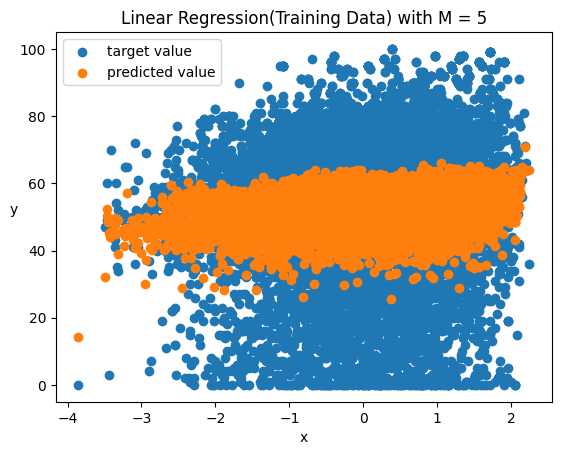

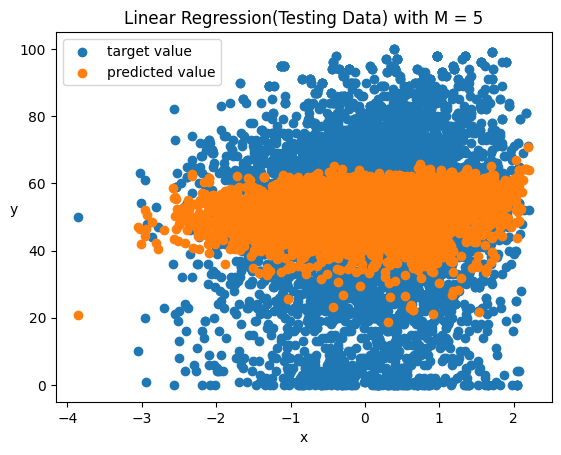

In [16]:
m = 5
w = linear.getw(N,m)
#train_MSE = np.append(train_MSE,linear.MSE(data_x_train,data_t_train,w,m))
#test_MSE = np.append(test_MSE,linear.MSE(data_x_test,data_t_test,w,m))
#train_ACC = np.append(train_ACC,linear.ACC(data_x_train,data_t_train,w,m))
#test_ACC = np.append(test_ACC,linear.ACC(data_x_test,data_t_test,w,m))
print(f'Training data MSE for M = {m} : ', linear.MSE(data_x_train,data_t_train,w,m))
print(f'Testing data MSE for M = {m} : ', linear.MSE(data_x_test,data_t_test,w,m))
print(f'Training data ACC for M = {m} : ', linear.ACC(data_x_train,data_t_train,w,m))
print(f'Testing data ACC for M = {m} : ', linear.ACC(data_x_test,data_t_test,w,m))
#x = np.linspace(-4, 2, 600)
y_train = linear.get_testing(data_x_train ,w , N, m)
plt.figure(1)
plt.title(f"Linear Regression(Training Data) with M = {m}")
plt.xlabel("x", rotation=0)
plt.ylabel("y", rotation=0)
plt.scatter(data_x_train[:,2], data_t_train, label="target value")
plt.scatter(data_x_train[:,2], y_train, label="predicted value")
plt.legend()
plt.show()


y_test = linear.get_testing(data_x_test ,w , 5817, m)
plt.figure(1)
plt.title(f"Linear Regression(Testing Data) with M = {m}")
plt.xlabel("x", rotation=0)
plt.ylabel("y", rotation=0)
plt.scatter(data_x_test[:,2], data_t_test, label="target value")
plt.scatter(data_x_test[:,2], y_test, label="predicted value")
plt.legend()
plt.show()


Q4

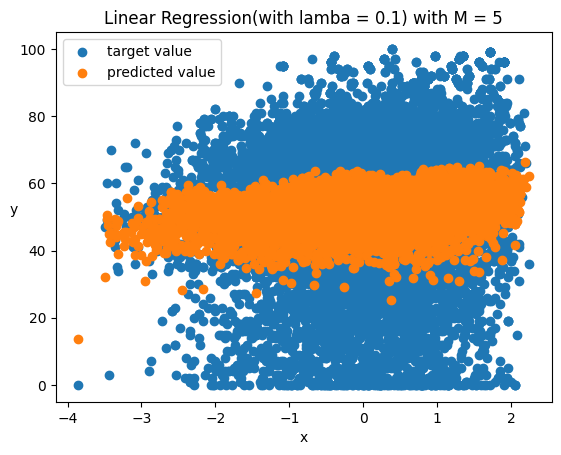

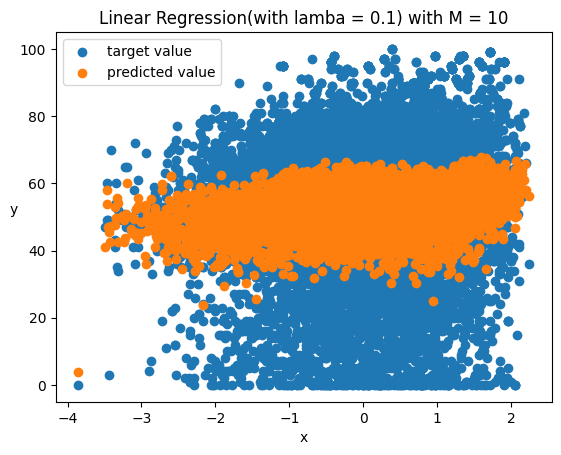

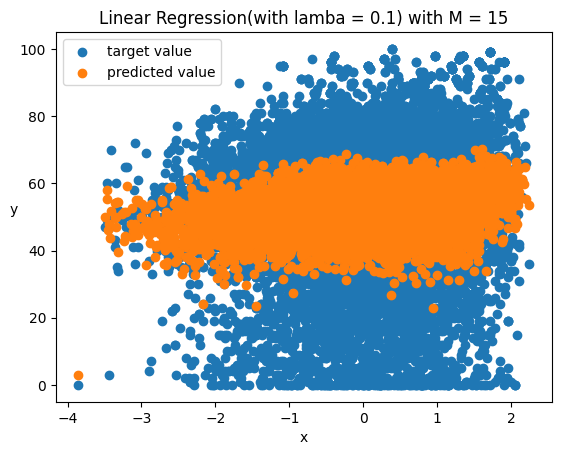

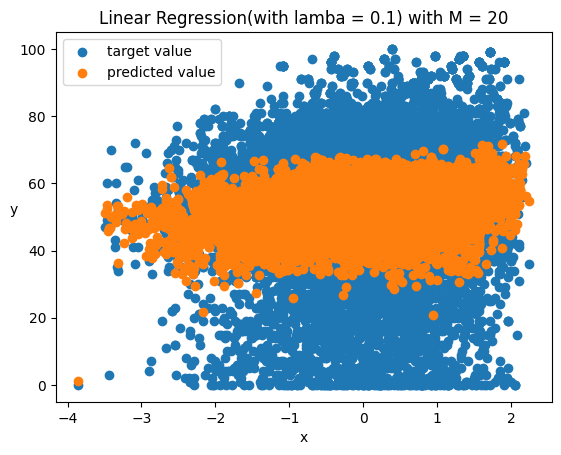

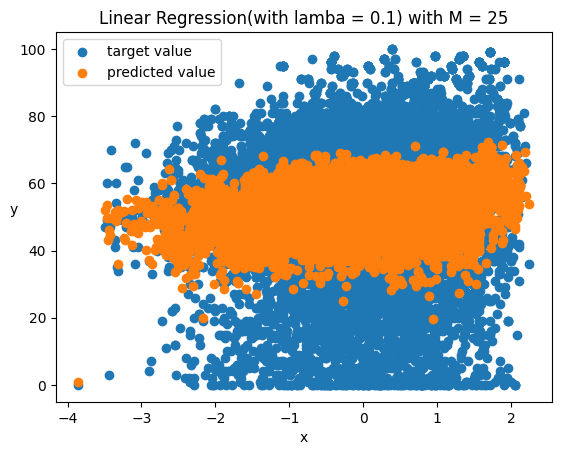

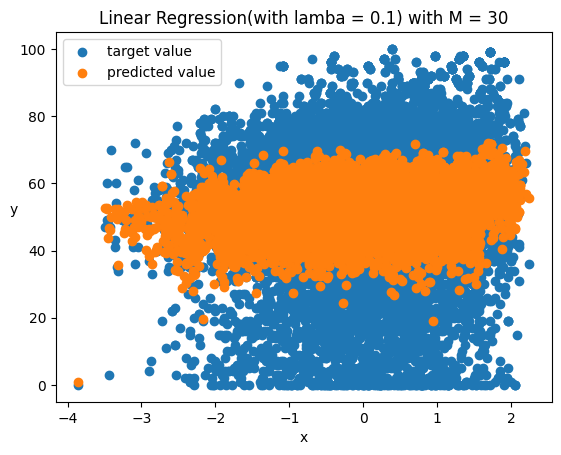

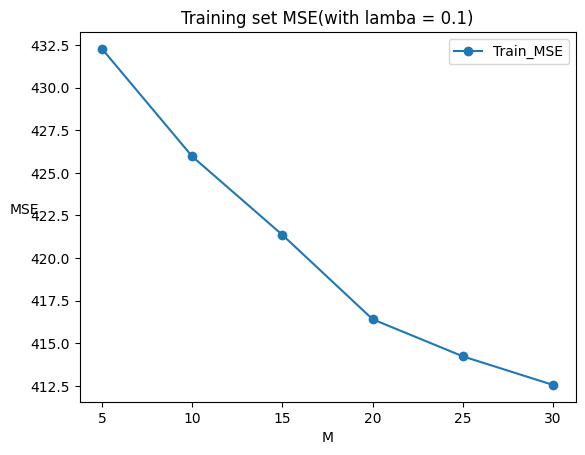

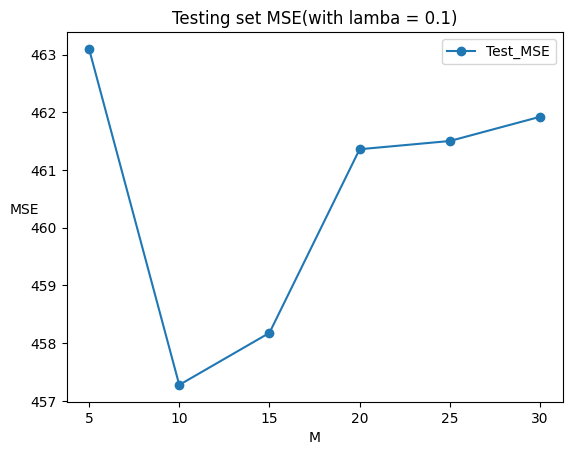

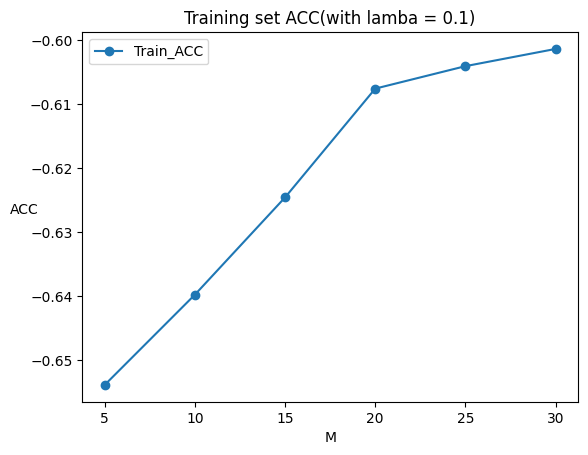

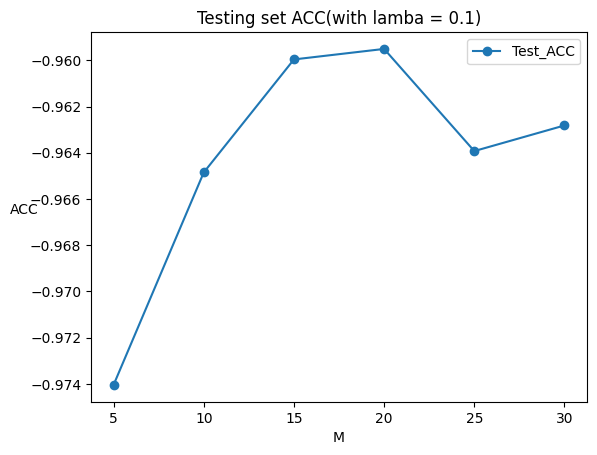

Training set MSE(with lamba = 0.1) : [432.2626626  425.9568504  421.35901731 416.41479218 414.24141056
 412.56529748]
Testing set MSE(with lamba = 0.1) : [463.10056775 457.27574023 458.17829324 461.36146617 461.50432929
 461.92374291]
Training set ACC(with lamba = 0.1) : [-0.65386759 -0.63977265 -0.62457704 -0.6075829  -0.60407382 -0.60138112]
Testing set ACC(with lamba = 0.1) : [-0.97404886 -0.96485312 -0.95996235 -0.95950738 -0.96392818 -0.96281924]


In [17]:
train_MSE = np.array([])
test_MSE = np.array([])
train_ACC = np.array([])
test_ACC = np.array([])
lamba = 0.1

for m in M:
    w = linear.getw(N,m,lamba)
    train_MSE = np.append(train_MSE,linear.MSE(data_x_train,data_t_train,w,m))
    test_MSE = np.append(test_MSE,linear.MSE(data_x_test,data_t_test,w,m))
    train_ACC = np.append(train_ACC,linear.ACC(data_x_train,data_t_train,w,m))
    test_ACC = np.append(test_ACC,linear.ACC(data_x_test,data_t_test,w,m))
    #print(f'Training data MSE for M = {m} : ', linear.MSE(data_x_train,data_t_train,w,m))
    #print(f'Testing data MSE for M = {m} : ', linear.MSE(data_x_test,data_t_test,w,m))
    #print(f'Training data ACC for M = {m} : ', linear.ACC(data_x_train,data_t_train,w,m))
    #print(f'Testing data ACC for M = {m} : ', linear.ACC(data_x_test,data_t_test,w,m))
    #x = np.linspace(-4, 2, 600)
    y = linear.get_testing(data_x_train ,w , N, m)
    plt.figure(1)
    plt.title(f"Linear Regression(with lamba = {lamba}) with M = {m}")
    plt.xlabel("x", rotation=0)
    plt.ylabel("y", rotation=0)
    plt.scatter(data_x_train[:,2], data_t_train, label="target value")
    plt.scatter(data_x_train[:,2], y, label="predicted value")
    plt.legend()
    plt.show()


draw(M,train_MSE,"Training set MSE(with lamba = 0.1)","M","MSE","Train_MSE")
draw(M,test_MSE,"Testing set MSE(with lamba = 0.1)","M","MSE","Test_MSE")
draw(M,train_ACC,"Training set ACC(with lamba = 0.1)","M","ACC","Train_ACC")
draw(M,test_ACC,"Testing set ACC(with lamba = 0.1)","M","ACC","Test_ACC")
print("Training set MSE(with lamba = 0.1) :",train_MSE)
print("Testing set MSE(with lamba = 0.1) :",test_MSE)
print("Training set ACC(with lamba = 0.1) :",train_ACC)
print("Testing set ACC(with lamba = 0.1) :",test_ACC)



Compare to different lamba

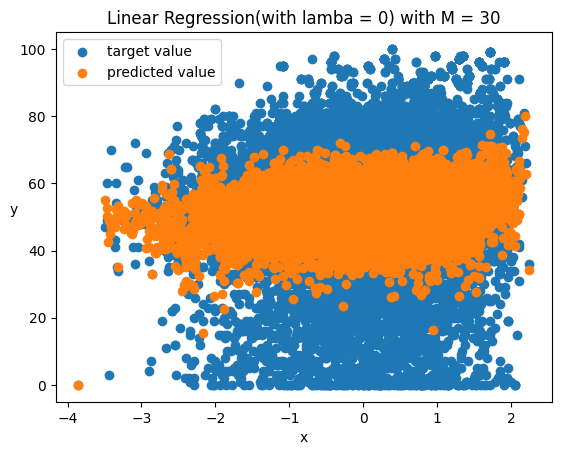

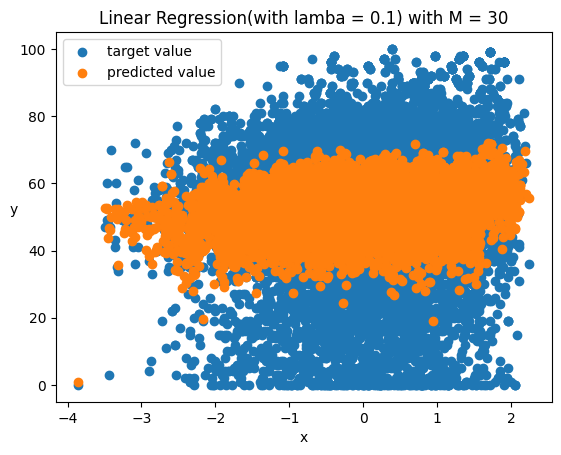

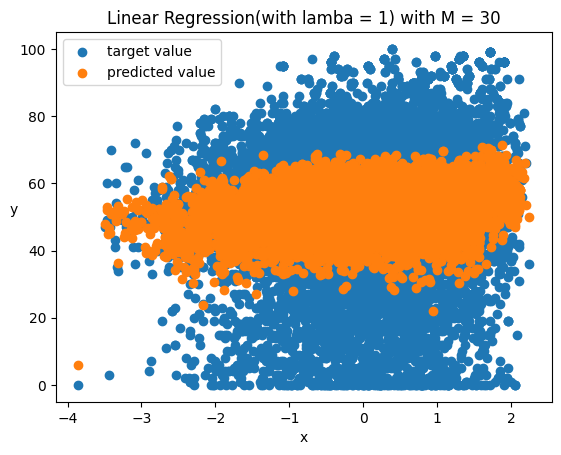

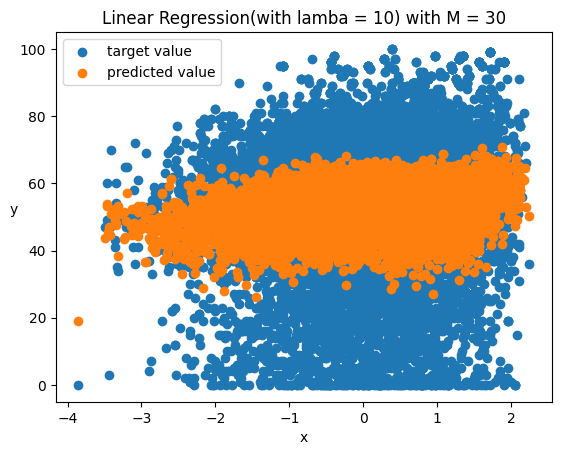

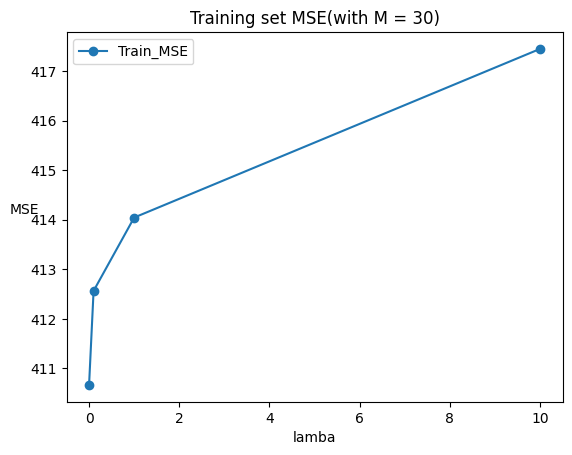

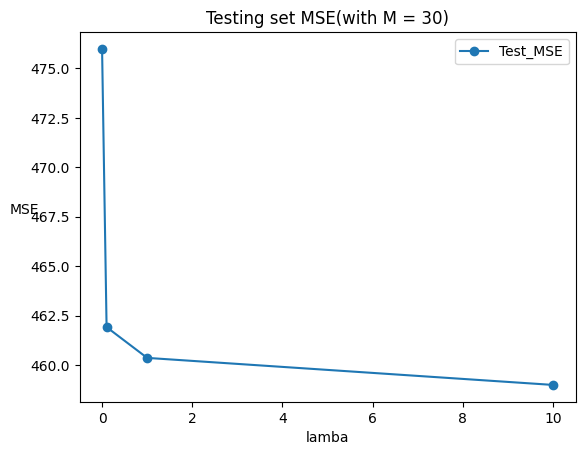

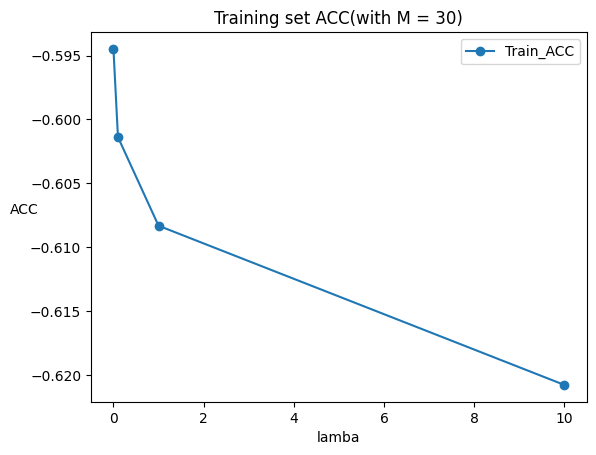

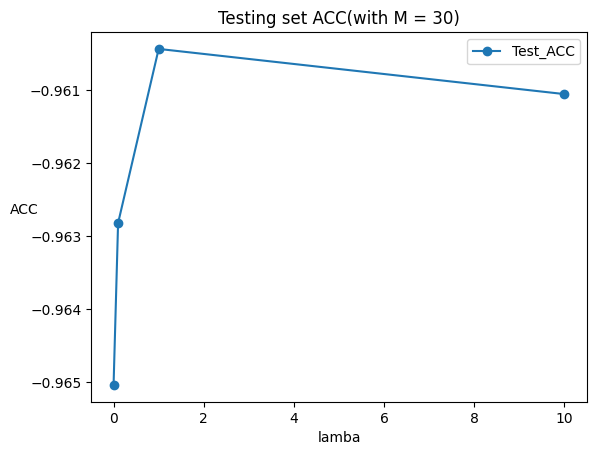

In [18]:
lamba = [0,0.1,1,10]
train_MSE = np.array([])
test_MSE = np.array([])
train_ACC = np.array([])
test_ACC = np.array([])
m = 30
for l in lamba:
    w = linear.getw(N,m,l)
    train_MSE = np.append(train_MSE,linear.MSE(data_x_train,data_t_train,w,m))
    test_MSE = np.append(test_MSE,linear.MSE(data_x_test,data_t_test,w,m))
    train_ACC = np.append(train_ACC,linear.ACC(data_x_train,data_t_train,w,m))
    test_ACC = np.append(test_ACC,linear.ACC(data_x_test,data_t_test,w,m))
    #print(f'Training data MSE for M = {m} : ', linear.MSE(data_x_train,data_t_train,w,m))
    #print(f'Testing data MSE for M = {m} : ', linear.MSE(data_x_test,data_t_test,w,m))
    #print(f'Training data ACC for M = {m} : ', linear.ACC(data_x_train,data_t_train,w,m))
    #print(f'Testing data ACC for M = {m} : ', linear.ACC(data_x_test,data_t_test,w,m))
    #x = np.linspace(-4, 2, 600)
    y = linear.get_testing(data_x_train ,w , N, m)
    plt.figure(1)
    plt.title(f"Linear Regression(with lamba = {l}) with M = {m}")
    plt.xlabel("x", rotation=0)
    plt.ylabel("y", rotation=0)
    plt.scatter(data_x_train[:,2], data_t_train, label="target value")
    plt.scatter(data_x_train[:,2], y, label="predicted value")
    plt.legend()
    plt.show()
draw(lamba,train_MSE,f"Training set MSE(with M = {m})","lamba","MSE","Train_MSE")
draw(lamba,test_MSE,f"Testing set MSE(with M = {m})","lamba","MSE","Test_MSE")
draw(lamba,train_ACC,f"Training set ACC(with M = {m})","lamba","ACC","Train_ACC")
draw(lamba,test_ACC,f"Testing set ACC(with M = {m})","lamba","ACC","Test_ACC")

Find most important features

In [19]:
w = linear.getw(N,10)
w = w.reshape(11,10)
sum = np.sum(np.abs(w),axis=1)
print(sum)

[ 545.11072887 1910.37104784  695.84303581  718.60422242 2281.6692197
 4818.72927972 1545.46976224  904.55776466 9816.00889813  640.25510571
 1886.40106774]


Demo

In [9]:
data = pd.read_csv('HW1_demo_day1.csv')
data = np.array(data)
x = data[0:, 1:]
t = data[0:, 0]
#print(data)
x = (x - mean) / std
m = 20
linear = Regression (data_x_train ,data_t_train)
w = linear.getw(N,m,lamba=0)
print(f'Training data ACC for M = {m} : ', linear.ACC(data_x_train,data_t_train,w,m))
print(f'Testing data ACC for M = {m} : ', linear.ACC(data_x_test,data_t_test,w,m))
print(f'Demo data ACC for M = {m} : ', linear.ACC(x,t,w,m))


Training data ACC for M = 20 :  -0.6059147951755024
Testing data ACC for M = 20 :  -0.9631184188604738
Demo data ACC for M = 20 :  -0.051624800701966844
